In [2]:
dataset_location = '/content/drive/Othercomputers/My Laptop (2)/computerdrive/lands detection.v8i.yolov11'



In [3]:
# Install required packages
!pip install -q ultralytics roboflow

# Check GPU
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 105.4 MB/s eta 0:00:00
Sat Nov  1 12:03:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                        

In [4]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
yaml_path = '/content/drive/Othercomputers/My Laptop (2)/computerdrive/lands detection.v8i.yolov11/data.yaml'
dataset_location = '/content/drive/Othercomputers/My Laptop (2)/computerdrive/lands detection.v8i.yolov11'



In [6]:
# Load dataset config
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

In [7]:
# Initialize YOLOv8 model
model = YOLO('yolov8s.pt')  # or yolov8n.pt / yolov8m.pt depending on your GPU

# Check if GPU is available and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


# Start training
model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    device=device,
    project='land_detection',
    name='train',
    exist_ok=True,
    pretrained=True
)

print("\n✅ Training completed! Model saved in: land_detection/train/weights/best.pt")

Using device: cuda
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/Othercomputers/My Laptop (2)/computerdrive/lands detection.v8i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, o

In [8]:
best_model = YOLO('land_detection/train/weights/best.pt')

test_image_path = '/1212.png'  # change this
if os.path.exists(test_image_path):
    results = best_model.predict(source=test_image_path, conf=0.25, imgsz=640, device=device)
    results[0].show()
else:
    print(f"⚠️ Test image not found: {test_image_path}")

⚠️ Test image not found: /1212.png


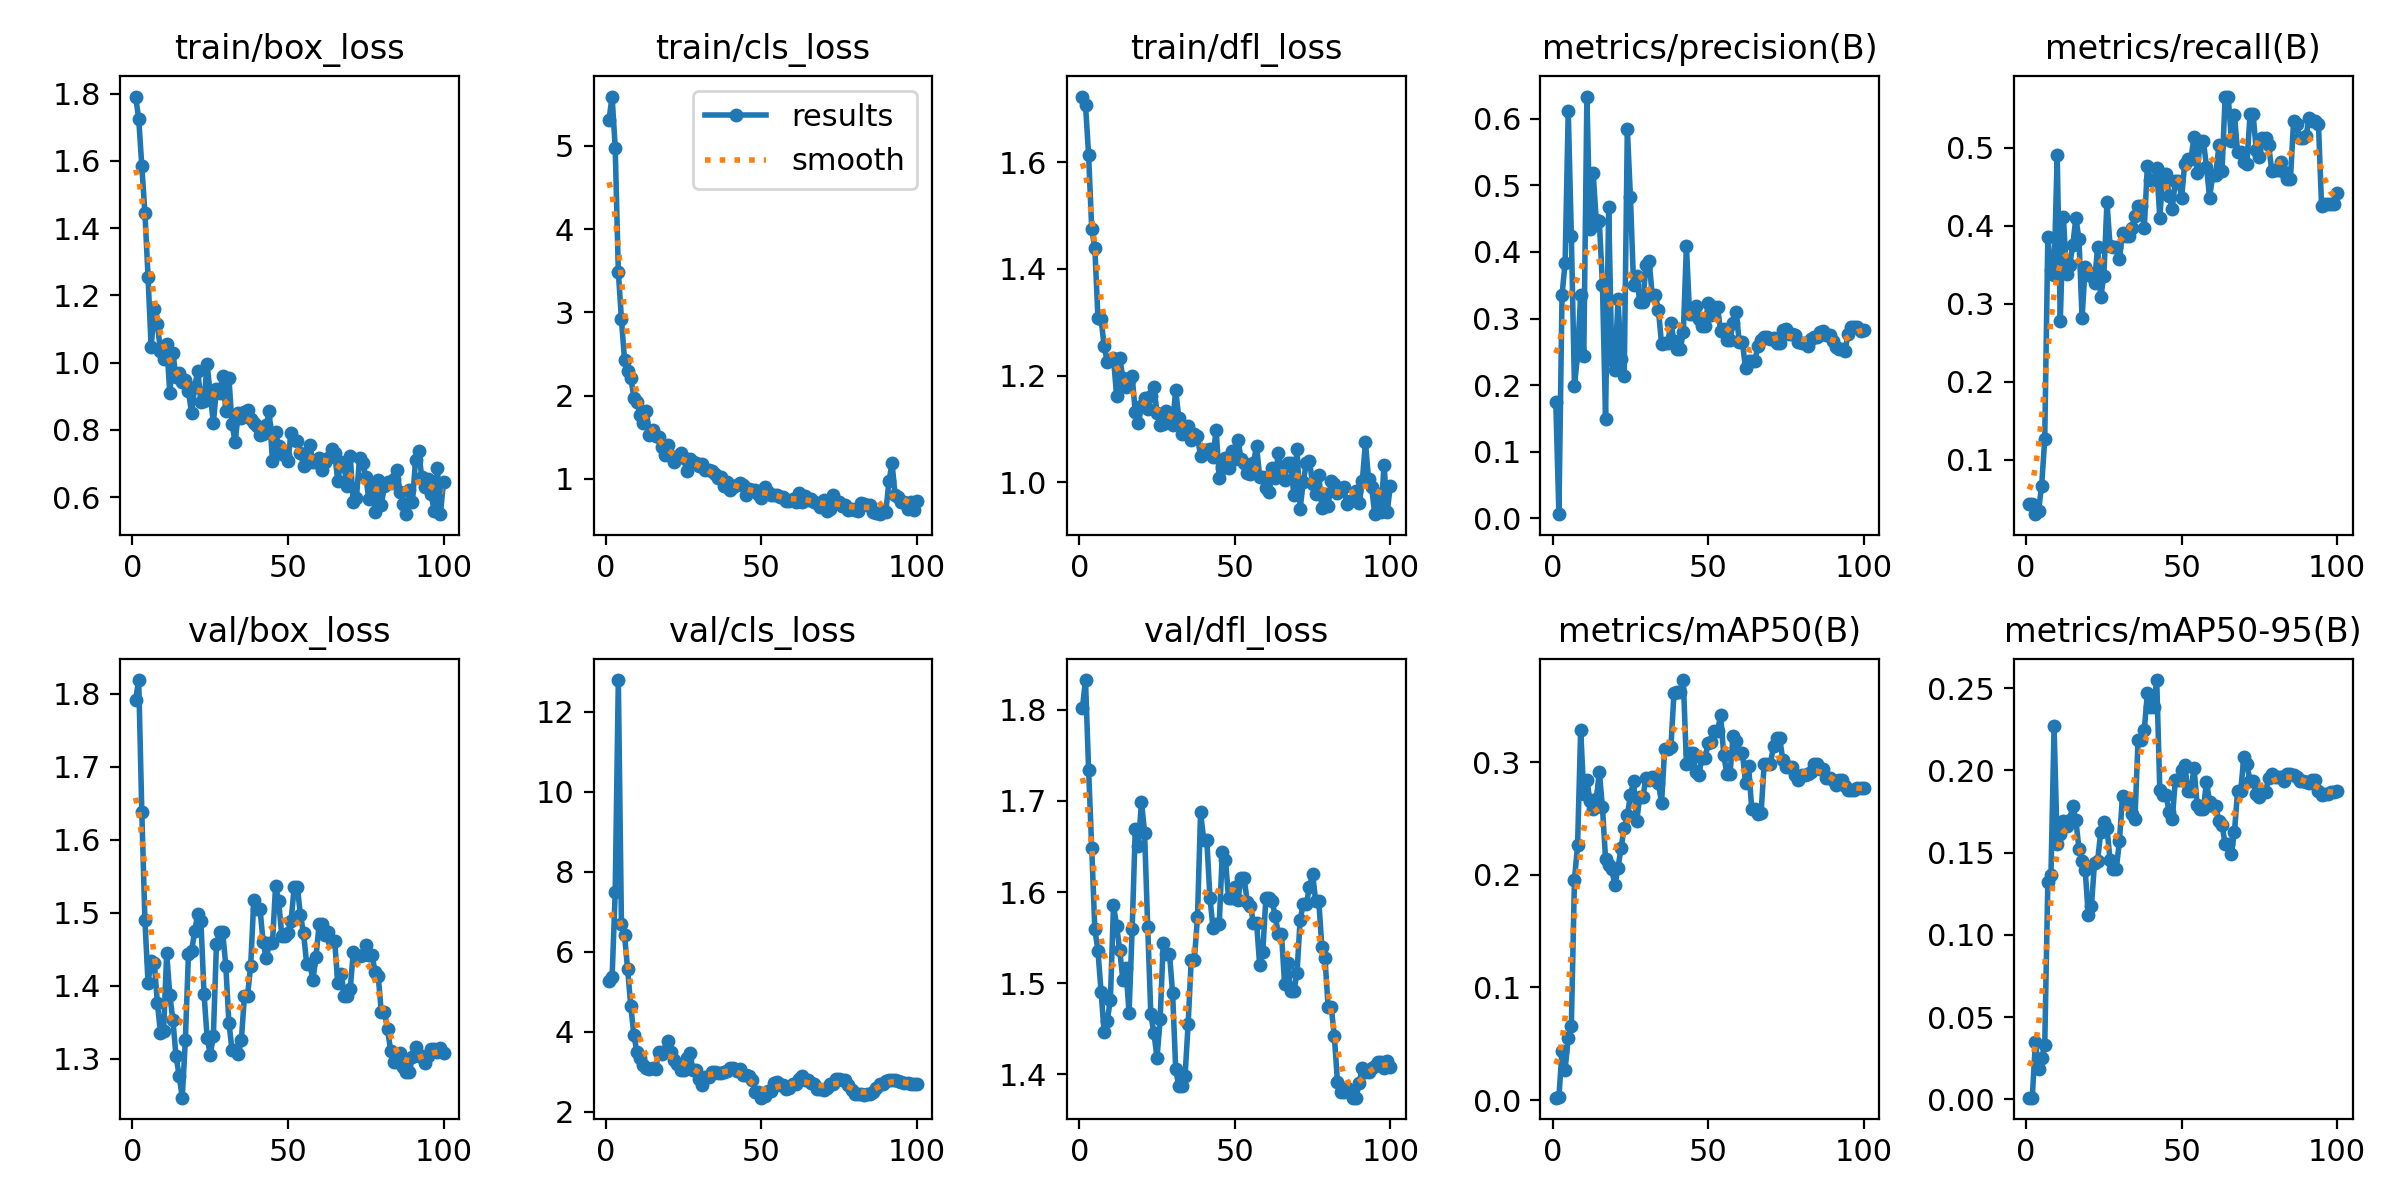

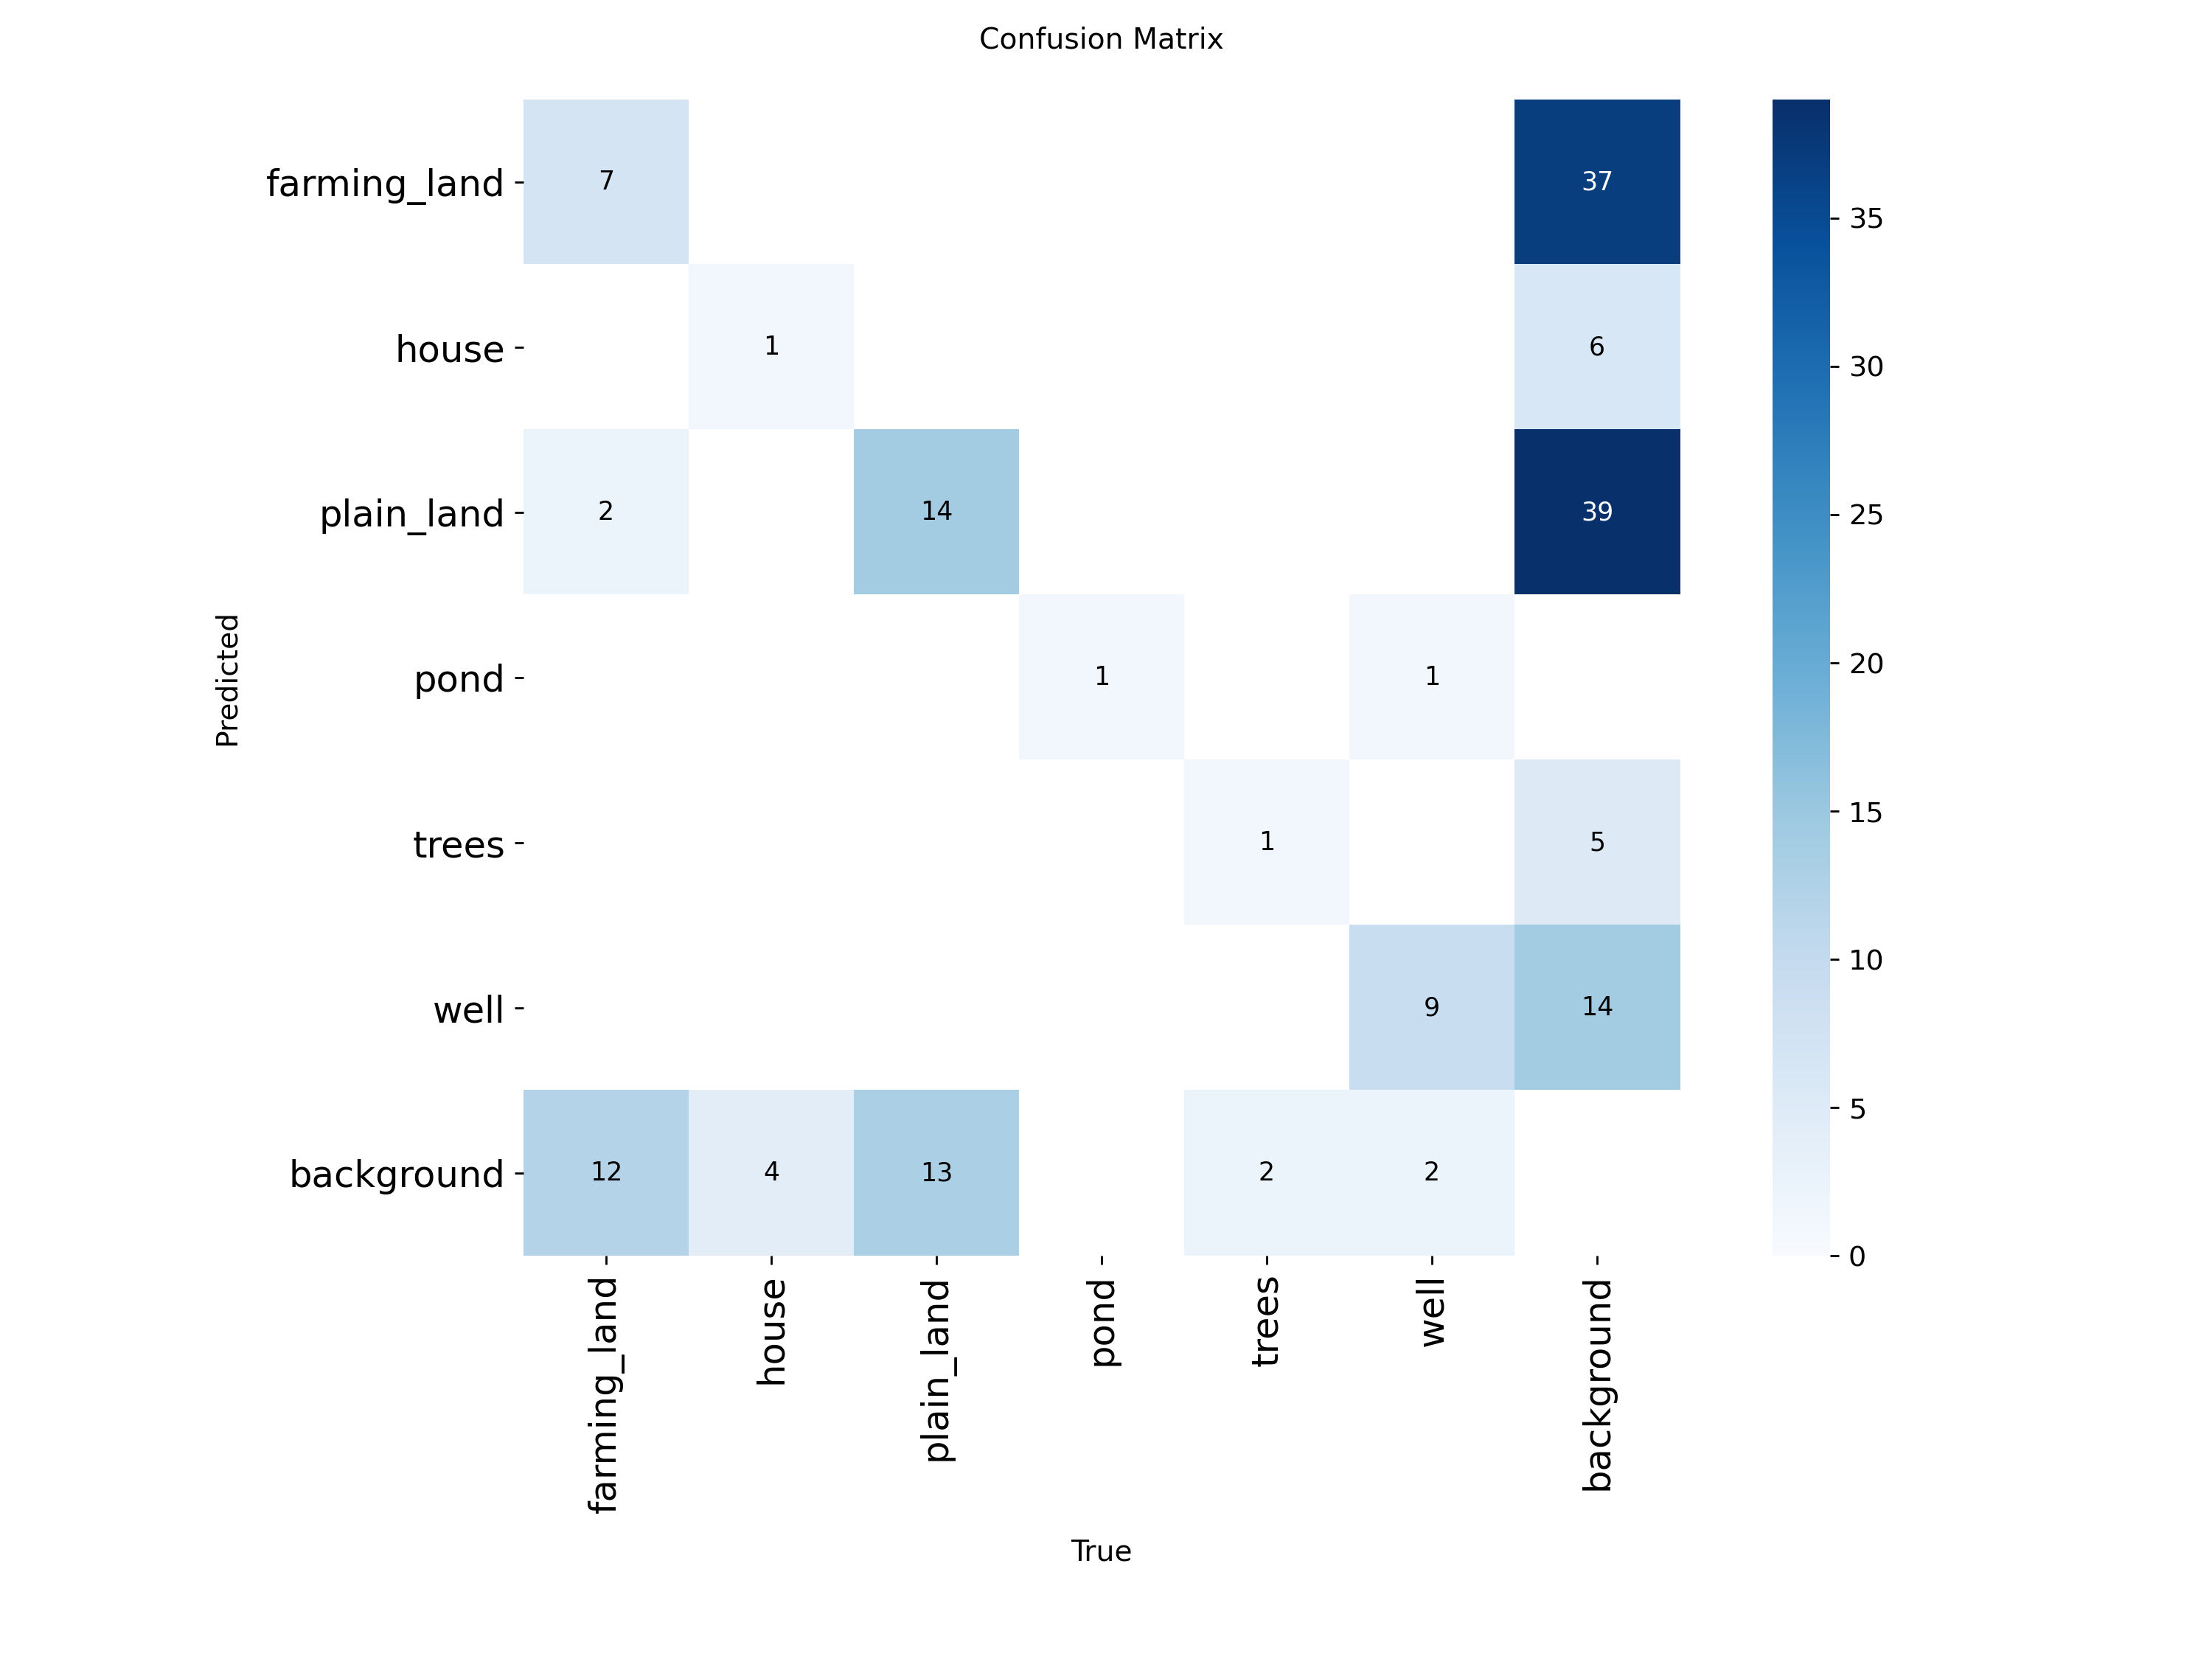

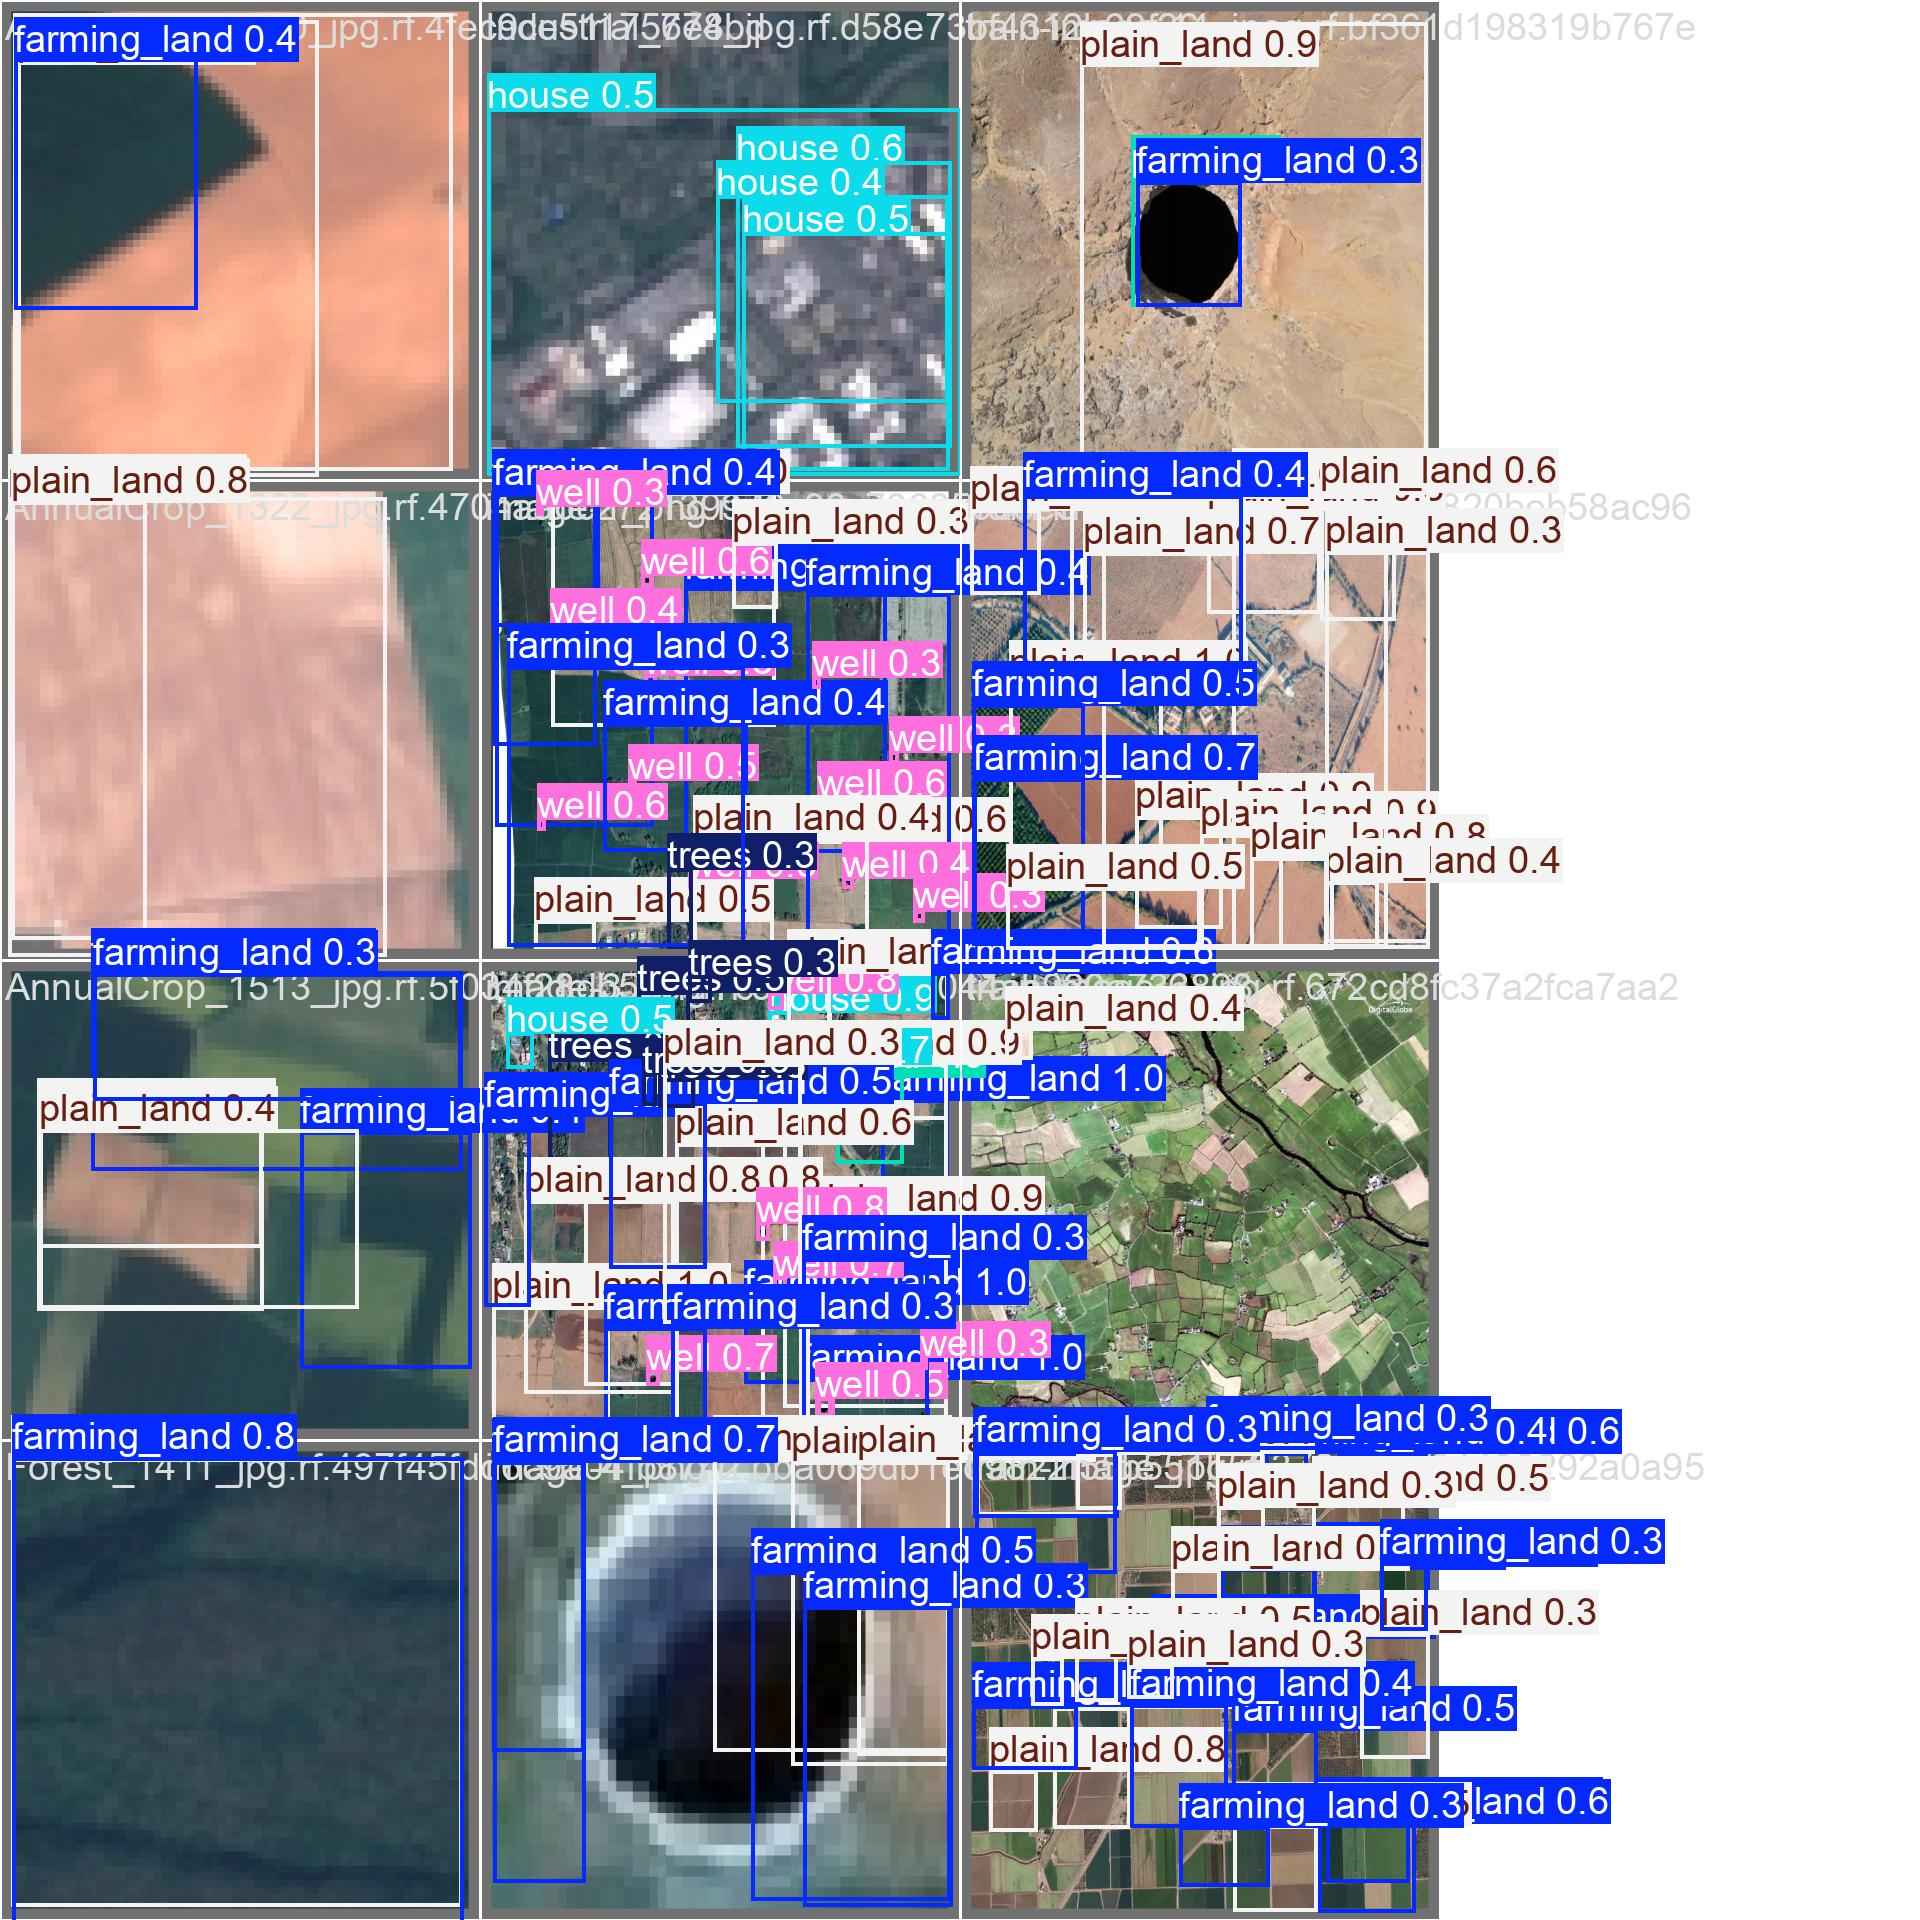

In [9]:
from IPython.display import Image, display

# Display training results (accuracy, loss curves)
display(Image(filename='land_detection/train/results.png', width=800))

# Display confusion matrix
display(Image(filename='land_detection/train/confusion_matrix.png', width=600))

# Display sample predictions from validation
display(Image(filename='land_detection/train/val_batch0_pred.jpg', width=800))


In [13]:
import streamlit as st
from ultralytics import YOLO
from PIL import Image

st.title("🌊 Land & Waterbody Detection App")

model = YOLO("/content/land_detection/train/weights/best.pt")

uploaded = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])
if uploaded:
    img = Image.open(uploaded)
    st.image(img, caption="Uploaded Image", use_column_width=True)
    results = model.predict(source=img, conf=0.25)
    st.image(results[0].plot(), caption="Detections", use_column_width=True)


2025-11-01 12:21:50.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 12:21:50.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar